In [3]:
import numpy as numpy
import pandas as pd
import matplotlib as mpl
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold, cross_val_score, RandomizedSearchCV
import joblib
from sklearn.svm import SVC
from scipy.stats import loguniform
import numpy as np
from sklearn.pipeline import make_pipeline

In [ ]:
combined_train = pd.read_csv("combined_train.csv")
combined_test = pd.read_csv("combined_test.csv")
train_metadata = pd.read_csv("train/train_metadata.csv")
test_metadata = pd.read_csv("test/test_metadata.csv")

In [5]:
class_ids = train_metadata["ClassId"]
test_ids = test_metadata['id']
combined_train = combined_train.drop("image_path", axis = 1)
combined_test = combined_test.drop("image_path", axis=1)

In [ ]:
skf = StratifiedKFold(n_splits=5)
pipeline = make_pipeline(StandardScaler(), SVC())
param_distributions = {
    'svc__C': loguniform(1e-3, 1e1),                  
    'svc__kernel': ['rbf', 'poly', 'sigmoid'],
    'svc__gamma': loguniform(1e-3, 1e2),              
    'svc__degree': np.arange(2, 6),                
    'svc__coef0': np.linspace(0, 1, 10),            
    'svc__shrinking': [True, False],                 
    'svc__class_weight': [None, 'balanced'],       
}
svc = SVC()
search = RandomizedSearchCV(
    pipeline,
    param_distributions=param_distributions,
    n_iter=500,
    cv=skf,
    scoring='accuracy',
    verbose=1,
    random_state=42,
    n_jobs=-1
)
search.fit(combined_train, class_ids)

Fitting 5 folds for each of 500 candidates, totalling 2500 fits


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=Pipeline(steps=[('standardscaler',
                                              StandardScaler()),
                                             ('svc', SVC())]),
                   n_iter=500, n_jobs=-1,
                   param_distributions={'svc__C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000001F367AFDC50>,
                                        'svc__class_weight': [None, 'balanced'],
                                        'svc__coef0': array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ]),
                                        'svc__degree': array([2, 3, 4, 5]),
                                        'svc__gamma': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000001F367AFDB70>,
                                        'svc__kernel': ['rbf', 'poly',
                                                        'sigmoid'],
                                        'svc__shrinking': [True, False]},
                   random_state=42, scoring='accuracy', verbose=1)

In [79]:
pd.DataFrame(search.cv_results_).sort_values(by="mean_test_score", ascending=False).head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_svc__C,param_svc__class_weight,param_svc__coef0,param_svc__degree,param_svc__gamma,param_svc__kernel,param_svc__shrinking,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
420,3.202284,0.412612,2.105679,0.099561,8.591834,None,0.000000,4,0.008339,rbf,False,"{'svc__C': 8.591834262827875, 'svc__class_weig...",0.867031,0.836066,0.863388,0.840474,0.870556,0.855503,0.014320,1
427,2.153543,0.217508,0.686296,0.028664,4.028877,balanced,0.888889,2,0.018690,poly,True,"{'svc__C': 4.028877318606246, 'svc__class_weig...",0.867942,0.834244,0.861566,0.845032,0.865998,0.854956,0.013128,2
10,5.023573,1.722036,2.579433,0.827264,5.089035,None,0.777778,3,0.009548,rbf,False,"{'svc__C': 5.089035297840714, 'svc__class_weig...",0.858834,0.826958,0.857923,0.819508,0.865998,0.845844,0.018821,3
133,3.772178,0.132502,1.069866,0.058493,7.548866,balanced,0.555556,3,0.019477,poly,True,"{'svc__C': 7.548866292494031, 'svc__class_weig...",0.844262,0.832423,0.844262,0.836828,0.848678,0.841291,0.005845,4
106,3.522308,0.229018,0.944980,0.088538,0.802571,balanced,1.000000,4,0.017248,poly,True,"{'svc__C': 0.8025708398690411, 'svc__class_wei...",0.846084,0.823315,0.841530,0.831358,0.852325,0.838922,0.010378,5
52,2.750200,0.219473,0.755262,0.073524,0.645560,balanced,0.666667,2,0.030377,poly,True,"{'svc__C': 0.6455595882939567, 'svc__class_wei...",0.847905,0.822404,0.852459,0.822242,0.838651,0.836732,0.012578,6
119,3.386306,0.256352,1.189991,0.328452,0.137307,balanced,1.000000,3,0.066275,poly,False,"{'svc__C': 0.1373074225544209, 'svc__class_wei...",0.843352,0.821494,0.839709,0.832270,0.844120,0.836189,0.008461,7
159,2.917084,0.422645,0.974760,0.124487,2.267735,balanced,0.666667,2,0.045786,poly,True,"{'svc__C': 2.2677352235512855, 'svc__class_wei...",0.836976,0.820583,0.836066,0.826800,0.850501,0.834185,0.010170,8
346,3.710923,0.127159,1.422759,0.152923,0.859919,balanced,0.444444,3,0.017494,poly,True,"{'svc__C': 0.8599189552684969, 'svc__class_wei...",0.845173,0.821494,0.840619,0.815861,0.844120,0.833454,0.012288,9
320,3.852754,0.500764,0.988633,0.073177,3.313724,balanced,0.222222,3,0.014261,poly,True,"{'svc__C': 3.313724129972939, 'svc__class_weig...",0.840619,0.821494,0.838798,0.827712,0.836828,0.833090,0.007303,10


In [7]:
bestSVM = search.best_estimator_
bestSVM.get_params()

NameError: name 'search' is not defined

In [11]:
K = 5
skf = StratifiedKFold(n_splits=K, random_state=2789, shuffle=True)
scores = []
cm = numpy.array(0)
for train, validation in skf.split(combined_train, class_ids):
    newSVM = SVC(C=8.6, gamma=0.008, kernel='rbf')
    standardiser = StandardScaler()
    scaled_train = standardiser.fit_transform(combined_train.iloc[train])
    scaled_val = standardiser.transform(combined_train.iloc[validation])
    newSVM.fit(scaled_train, class_ids[train])
    if cm.any():
        cm += confusion_matrix(class_ids[validation], newSVM.predict(scaled_val), normalize='true')
    else:
        cm = confusion_matrix(class_ids[validation], newSVM.predict(scaled_val), normalize='true')
    scores.append(newSVM.score(scaled_val, class_ids[validation]))
print(scores)
print(sum(scores)/len(scores))
cumCM = cm/K

[0.8624772313296903, 0.8579234972677595, 0.8442622950819673, 0.8650865998176845, 0.8422971741112124]
0.8544093595216629


<Axes: >

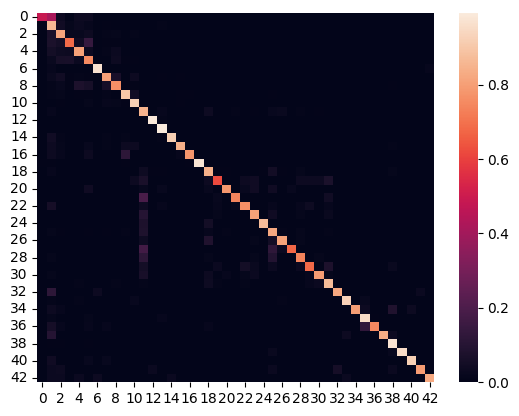

In [12]:
sns.heatmap(cumCM)

In [13]:
def printSigns(accuracies, top_n, reverse=False):
    if reverse == True:
        accuracies = list(reversed(accuracies))
    for i in range(top_n):
        classID = accuracies[i][1]
        mpl.pyplot.subplot(2,top_n//2, i + 1)
        img = mpl.image.imread(f'Sign Images/{classID}.png')
        mpl.pyplot.imshow(img)
    mpl.pyplot.show()

In [14]:
class_accuracies = sorted((cumCM[i][i], i) for i in range(43))

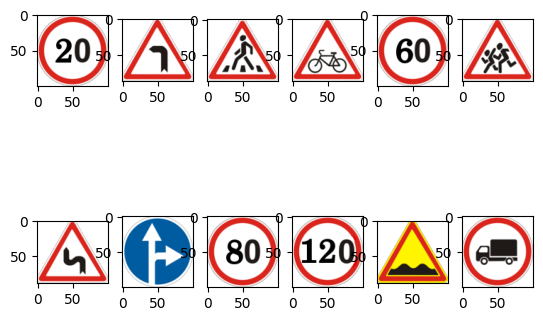

In [15]:
printSigns(class_accuracies, 12)

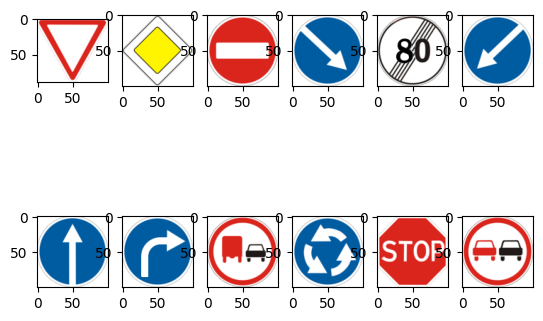

[(np.float64(0.8979094076655052), 9), (np.float64(0.9173160173160173), 14), (np.float64(0.9199999999999999), 40), (np.float64(0.9216791979949874), 10), (np.float64(0.9268421052631579), 33), (np.float64(0.952584670231729), 35), (np.float64(0.9527777777777778), 39), (np.float64(0.9666666666666666), 6), (np.float64(0.9724137931034482), 38), (np.float64(0.9741935483870968), 17), (np.float64(0.9863822326125072), 12), (np.float64(0.9933333333333334), 13)]


In [17]:
printSigns(class_accuracies, 12, True)
print(class_accuracies[-12:])

In [ ]:
output = pd.DataFrame()
output["id"] = test_ids
output["ClassId"] = bestSVM.predict(combined_test)
output.to_csv("svm_intial_outcome.csv", index=False)